0, 	1008.1434326171875, 	8.31259536743164, 	0.6827011108398438
1, 	449.14874267578125, 	-3.9000778198242188, 	1.0119879245758057
2, 	200.2412567138672, 	4.249068260192871, 	1.1532906293869019
3, 	89.37618255615234, 	-1.184999942779541, 	1.3478243350982666
4, 	39.97535705566406, 	2.4414687156677246, 	1.449110507965088
5, 	17.949413299560547, 	0.023627042770385742, 	1.566404104232788
6, 	8.120439529418945, 	1.637500524520874, 	1.6360605955123901
7, 	3.728888750076294, 	0.5617436170578003, 	1.707924485206604
8, 	1.7633136510849, 	1.2799921035766602, 	1.7546581029891968
9, 	0.8813591003417969, 	0.8013877272605896, 	1.7992274761199951
10, 	0.48422563076019287, 	1.1210625171661377, 	1.830096960067749
11, 	0.30451294779777527, 	0.9081481099128723, 	1.8579893112182617
12, 	0.22262626886367798, 	1.0504409074783325, 	1.8781739473342896
13, 	0.18496058881282806, 	0.9557334780693054, 	1.8957446813583374
14, 	0.16741420328617096, 	1.0190790891647339, 	1.9088541269302368
15, 	0.1591033935546875, 	0.

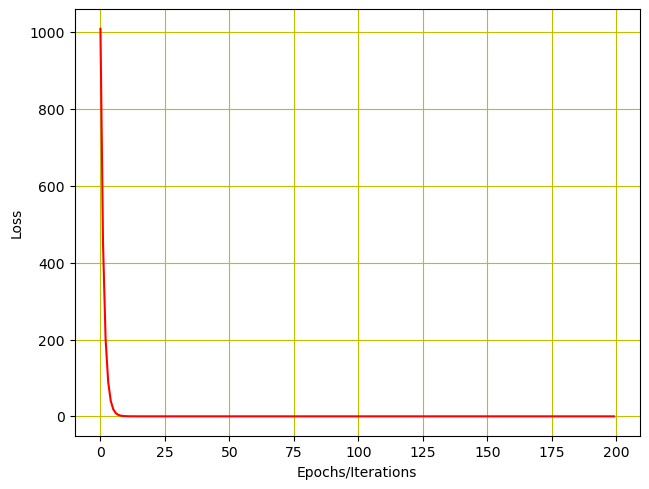

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = 1 * X + 2
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)

stats_params = {"w": [], "b": []}
stats_params["w"].append(w.item())
stats_params["b"].append(b.item())

step_size = 0.1
loss_list = []
iter = 200

for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data

    stats_params["w"].append(w.item())
    stats_params["b"].append(b.item())

    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

<Axes: >

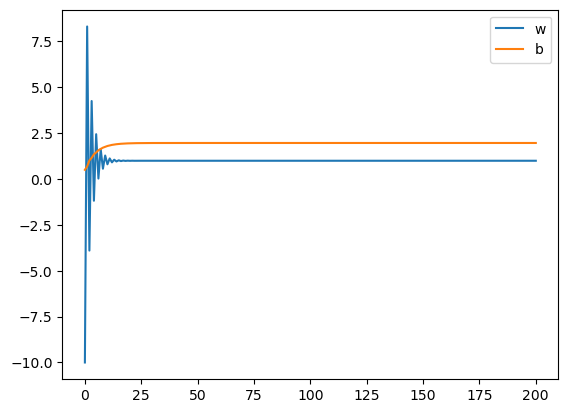

In [2]:
pd.DataFrame(stats_params).plot()